In [1]:
from eit_reconstruction_models import EITReconstructionModel as EITModel
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import os
from load_eit_data_from_csv import DataLoader
from visualise_reconstruction import *

2025-04-30 14:31:14.200817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746019874.214480  565422 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746019874.218578  565422 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746019874.230188  565422 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746019874.230205  565422 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746019874.230207  565422 computation_placer.cc:177] computation placer alr

In [ ]:
data_dir = "8 electrodes, 0.4 grid size, 0.2 z-value"
single_touch_data_file = "cylinder_sim_single_8_4.csv"
multi_touch_data_file = "cylinder_multi_touch_8_4_new.csv"
pickle_fname = "3d_8_elec_4"

# data_dir = "16 electrodes, 0.4 grid size, 0.2 z-values"
# single_touch_data_file = "cylinder_sim_single_16_4_new.csv"
# multi_touch_data_file = "cylinder_multi_touch_16_4_new.csv"
# pickle_fname = "3d_16_elec_4"

# data_dir = "16 electrodes, 0.2 grid size, 0.1 z-value"
# single_touch_data_file = "cylinder_sim_single_16_2_new.csv"
# multi_touch_data_file = "cylinder_multi_touch_16_2_new.csv"
# pickle_fname = "3d_16_elec_2"

In [ ]:
dataloader = DataLoader(64) # for 8 electrodes
# dataloader = DataLoader(256) # for 16 electrodes

dataloader.load_data(os.path.join(".", data_dir, single_touch_data_file), os.path.join(".", data_dir, multi_touch_data_file), three_d=True, force=False)


In [ ]:
# split data, standarise data and add noise
def add_gaussian_noise(X, mean=0.0, std=0.01):
    noise = np.random.normal(loc=mean, scale=std, size=X.shape)
    return X + noise

X_train, X_test, y_train, y_test = train_test_split(dataloader.voltage_array, dataloader.output_array, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_train = add_gaussian_noise(X_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test, X_val = scaler.transform(X_test), scaler.transform(X_val)


/cs/student/projects1/2021/nchavda/Final-year-project/load_eit_data_from_csv.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  area = float(row[(self.num_classes - 1) * 3 + self.pairs_electrodes])


In [ ]:
# initalise model
my_t = EITModel(64, len(dataloader.index_to_coordinate)) # for 8 electrodes
# my_t = EITModel(256, len(dataloader.index_to_coordinate)) # for 16 electrodes
model = my_t.create_1d_cnn_model_classification()


In [ ]:
# train model
history = my_t.model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=1000,
                    batch_size=128, 
                    callbacks=[])

Epoch 1/1000


I0000 00:00:1746019886.519218  565480 service.cc:152] XLA service 0x7f014c003100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746019886.519234  565480 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2025-04-30 14:31:26.558128: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746019886.840503  565480 cuda_dnn.cc:529] Loaded cuDNN version 90300


44/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - example_based_f1: 0.3544 - hamming_loss: 0.4719 - jaccard_accuracy: 0.2355 - loss: 0.6816 - root_mean_squared_error: 0.4945

I0000 00:00:1746019888.570412  565480 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - example_based_f1: 0.3679 - hamming_loss: 0.4565 - jaccard_accuracy: 0.2525 - loss: 0.6741 - root_mean_squared_error: 0.4909 - val_example_based_f1: 0.5100 - val_hamming_loss: 0.3087 - val_jaccard_accuracy: 0.4326 - val_loss: 0.5792 - val_root_mean_squared_error: 0.4456
Epoch 2/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - example_based_f1: 0.5106 - hamming_loss: 0.3152 - jaccard_accuracy: 0.4302 - loss: 0.5870 - root_mean_squared_error: 0.4493 - val_example_based_f1: 0.5046 - val_hamming_loss: 0.3119 - val_jaccard_accuracy: 0.4281 - val_loss: 0.5785 - val_root_mean_squared_error: 0.4462
Epoch 3/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - example_based_f1: 0.5009 - hamming_loss: 0.3110 - jaccard_accuracy: 0.4222 - loss: 0.5774 - root_mean_squared_error: 0.4454 - val_example_based_f1: 0.5067 - val_hamming_loss: 0.3079 - val_jaccard_accuracy: 0.4299 - val_loss: 0.5703 - val_root_mean_squared_error: 0.4429
Epoch 4/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# evaluate model
results = my_t.evaluate_model(X_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - example_based_f1: 0.3009 - hamming_loss: 0.3696 - jaccard_accuracy: 0.2322 - loss: 0.6272 - root_mean_squared_error: 0.4579
Test Loss: 0.6249616146087646, Test Accuracy: 0.2505686581134796


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
[2.24474345e-20 3.80385011e-01 1.81976426e-02 1.50582381e-03
 8.53508525e-03 5.07041812e-03 7.69198453e-03 8.85936492e-18
 4.69714440e-02 2.30501756e-01 1.88478013e-03 2.95381974e-02
 6.94073588e-02 2.06282049e-01 1.26635641e-01 1.22375622e-01
 5.34650013e-02 2.14404911e-01 1.79866210e-01 5.20772524e-02
 1.42009988e-01 1.90555841e-01 4.50305223e-01 1.00087047e-01
 4.21165153e-02 1.93865195e-01 2.25654263e-02 7.27954283e-02
 1.99473158e-01 2.93610871e-01 2.34517753e-01 4.00521979e-02
 1.91901937e-01 2.42590886e-02 9.82430577e-02 8.61889645e-02
 6.53949529e-02 2.24343732e-01 2.25800425e-02 3.07559073e-02
 3.76876928e-02 6.69899583e-02 1.87635526e-01 5.50613664e-02
 2.05934688e-01 7.87792578e-02 5.04868403e-02 9.50931665e-03
 1.34172607e-02 6.93726242e-02 1.82862148e-01 1.07126243e-01
 7.19315792e-03 1.58290174e-02 1.26585234e-02 4.32365164e-02
 3.62824611e-02 6.22725897e-02 3.22945006e-02 2.34700125e-02
 6.38711359e-03 6.60410896e-02 1.88952778e-0

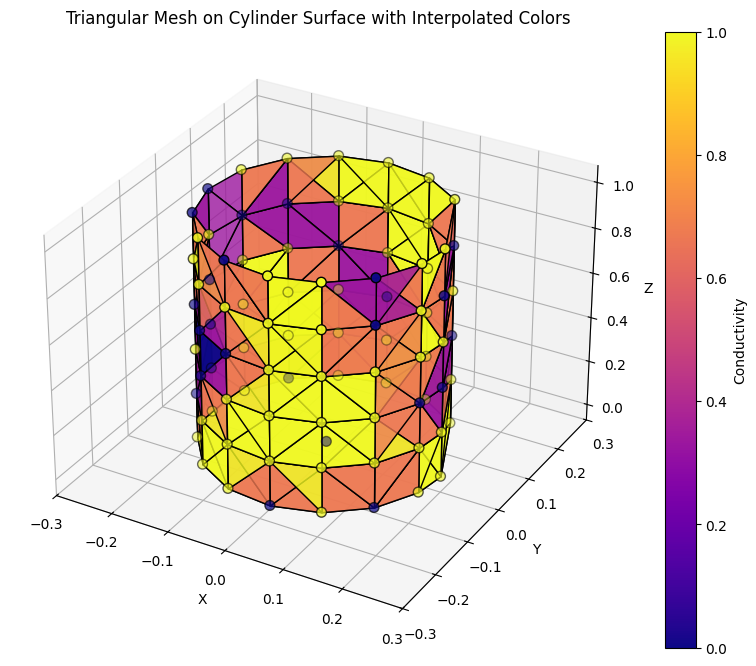

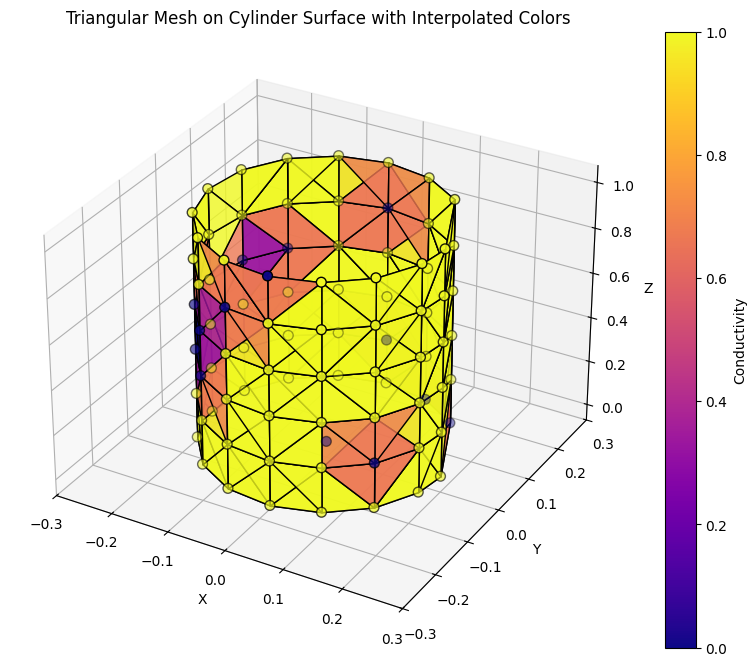

In [ ]:
# make inferences using test set, and plot image reconstruction
y_pred = my_t.model.predict(X_test)
print(y_pred[10])
y_pred_bin = (y_pred >= 0.37).astype(int) # threshold
print(y_test[100])
print(y_pred_bin[1])
y_pred = my_t.model.predict(X_test)
create_cylinder_surface_mesh(dataloader.index_to_coordinate, y_pred_bin[8]) #1031 # 1001
create_cylinder_surface_mesh(dataloader.index_to_coordinate, y_test[8])